# **MATCH YOUR RESUME TO THE JOB YOU ARE APPLYING TO**
You might be the perfect candidate for a position but never get past the resume match. The image below shows the flowchart of how it works.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/improve-resume-flowchart/AI-improve-resume-flowchart.png


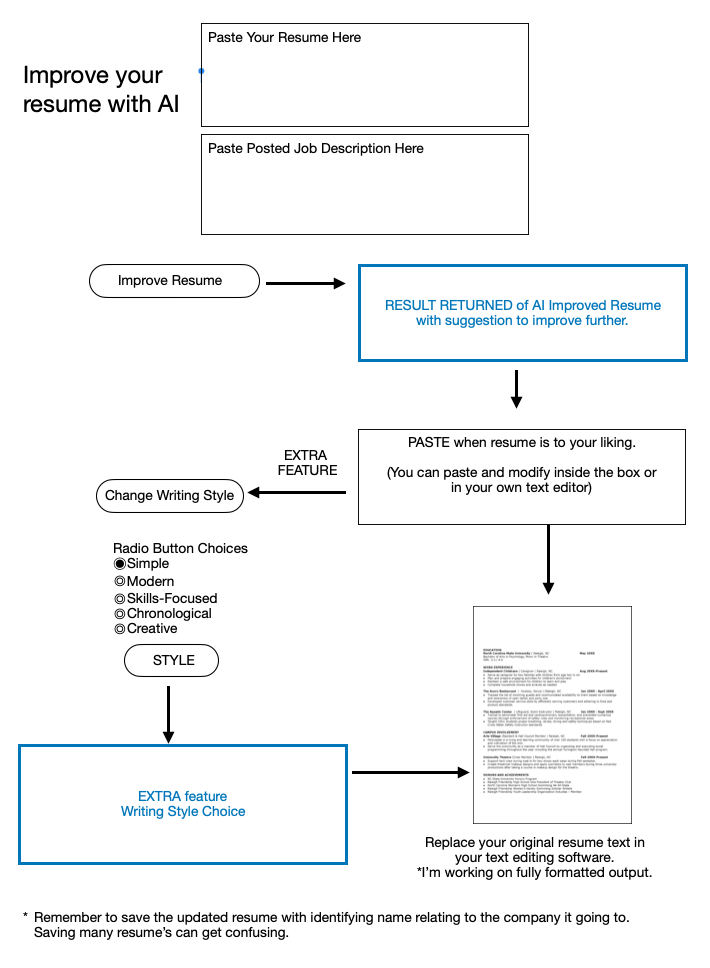

In [2]:
from IPython.display import Image
Image('/kaggle/input/improve-resume-flowchart/AI-improve-resume-flowchart.png')

In [3]:
%pip install -U -q "google-generativeai>=0.8.3"
import pandas as pd
import ipywidgets as widgets
import google.generativeai as genai
from IPython.display import display, Markdown, HTML
from kaggle_secrets import UserSecretsClient

GOOGLE_API_KEY = UserSecretsClient().get_secret("GOOGLE_API_KEY")
genai.configure(api_key=GOOGLE_API_KEY)

flash = genai.GenerativeModel('gemini-1.5-flash')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 6.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# **PASTE INTO THE BOXES AND PRESS THE "IMPROVE RESUME" BUTTON**
You will need your current resume and the job description as posted by the company you are applying with. AI will make it a closer match, without fabricating information. It will give suggestions to improve your chances for your resume to be seen by a hiring manager.

In [4]:
resume_input = widgets.Textarea(
    value='',
    placeholder='Paste your resume here...',
    layout=widgets.Layout(width='90%', height='200px')
)

job_input = widgets.Textarea(
    value='',
    placeholder='Paste the job description here...',
    layout=widgets.Layout(width='90%', height='200px')
)

process_button = widgets.Button(description="Improve Resume")
output_area = widgets.Output()

display(resume_input)
display(job_input)
display(process_button)
display(output_area)

def improve_resume(b):
    with output_area:
        output_area.clear_output()
        resume_text = resume_input.value
        job_description = job_input.value

        if not resume_text or not job_description:
            print("Please paste both your resume and the job description.")
            return

        prompt = f"""Analyze the following resume and job description. Improve the resume to better match the job requirements.
        
        Resume:
        {resume_text}

        Job Description:
        {job_description}

        Provide the improved resume:
        """

        try:
            response = flash.generate_content(prompt)
            improved_resume = response.text # Extract the generated text

            display(Markdown("### Improved Resume:"))
            print(improved_resume)

            # Optional HTML output (you'll need to define what you want to put here)
            # html_output = HTML(...)
            display(html_output)

        except Exception as e:
            print(f"An error occurred: {e}")

Textarea(value='', layout=Layout(height='200px', width='90%'), placeholder='Paste your resume here...')

Textarea(value='', layout=Layout(height='200px', width='90%'), placeholder='Paste the job description here...'…

Button(description='Improve Resume', style=ButtonStyle())

Output()

# **EXTRA FEATURE**
This step changes the voice of your resume. Copy and paste the "Improved Resume" (after addressing AI comments and removing those comments).

In [5]:
import ipywidgets as widgets
from IPython.display import display, Markdown, HTML

# Assume 'flash' (your GenerativeModel instance) is already defined

improved_resume_input = widgets.Textarea(
    value='',
    placeholder='Paste your improved resume text here...',
    description='Improved Resume for formatting:',
    layout=widgets.Layout(width='80%', height='200px')
)

layout_choices = {
    "Layout 1 (Simple)": "simple",
    "Layout 2 (Modern)": "modern",
    "Layout 3 (Skills-Focused)": "skills",
    "Layout 4 (Chronological)": "chronological",
    "Layout 5 (Creative)": "creative"
}

layout_selector = widgets.RadioButtons(
    options=list(layout_choices.keys()),
    description='Choose a Layout:',
    disabled=False
)

format_button = widgets.Button(description="Format Resume")
output_area = widgets.Output()

display(improved_resume_input)
display(layout_selector)
display(format_button)
display(output_area)

def format_resume(b):
    with output_area:
        output_area.clear_output()
        improved_resume_text = improved_resume_input.value
        selected_layout_name = layout_selector.value
        selected_layout_style = layout_choices[selected_layout_name]

        if not improved_resume_text:
            print("Please paste your improved text resume here.")
            return

        prompt = f"""Format the following improved resume text using the '{selected_layout_style}' style:

        Improved Resume Text:
        {improved_resume_text}

        Provide the formatted resume:
        """

        try:
            response = flash.generate_content(prompt)
            formatted_resume = response.text

            display(Markdown(f"### Formatted Resume ({selected_layout_name}):"))
            print(formatted_resume)

            display(html_output)

        except Exception as e:
            print(f"An error occurred: {e}")

format_button.on_click(format_resume)

Textarea(value='', description='Improved Resume for formatting:', layout=Layout(height='200px', width='80%'), …

RadioButtons(description='Choose a Layout:', options=('Layout 1 (Simple)', 'Layout 2 (Modern)', 'Layout 3 (Ski…

Button(description='Format Resume', style=ButtonStyle())

Output()